In [470]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [471]:
df = pd.read_csv("survey_results_public.csv")
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [472]:
df.shape

(64461, 61)

In [473]:
df.isnull().sum()

Respondent                0
MainBranch              299
Hobbyist                 45
Age                   19015
Age1stCode             6561
                      ...  
WebframeWorkedWith    22182
WelcomeChange         11778
WorkWeekHrs           23310
YearsCode              6777
YearsCodePro          18112
Length: 61, dtype: int64

In [474]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [475]:
#keep the necessary columns
keepColumns = ["Country","EdLevel","YearsCodePro","Employment","ConvertedComp"]
df = df[keepColumns]
df = df.rename({"ConvertedComp":"Salary"},axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN
3,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [476]:
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [477]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       34756 non-null  object 
 1   EdLevel       34188 non-null  object 
 2   YearsCodePro  34621 non-null  object 
 3   Employment    34717 non-null  object 
 4   Salary        34756 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.6+ MB
None


In [478]:
df.shape

(34756, 5)

In [479]:
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [480]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment",axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   EdLevel       30019 non-null  object 
 2   YearsCodePro  30019 non-null  object 
 3   Salary        30019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB
None


In [481]:
df["Country"].value_counts()

United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: Country, Length: 154, dtype: int64

In [482]:
def shorten(categories,threshold):
    new_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= threshold:
            new_map[categories.index[i]] = categories.index[i]
        else:
            new_map[categories.index[i]] = "Other"  
            
    return new_map         

In [483]:
catMap = shorten(df.Country.value_counts(),400)
df["Country"] = df["Country"].map(catMap)
df.Country.value_counts()

Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

Using boxplots to investigate and handle outliers

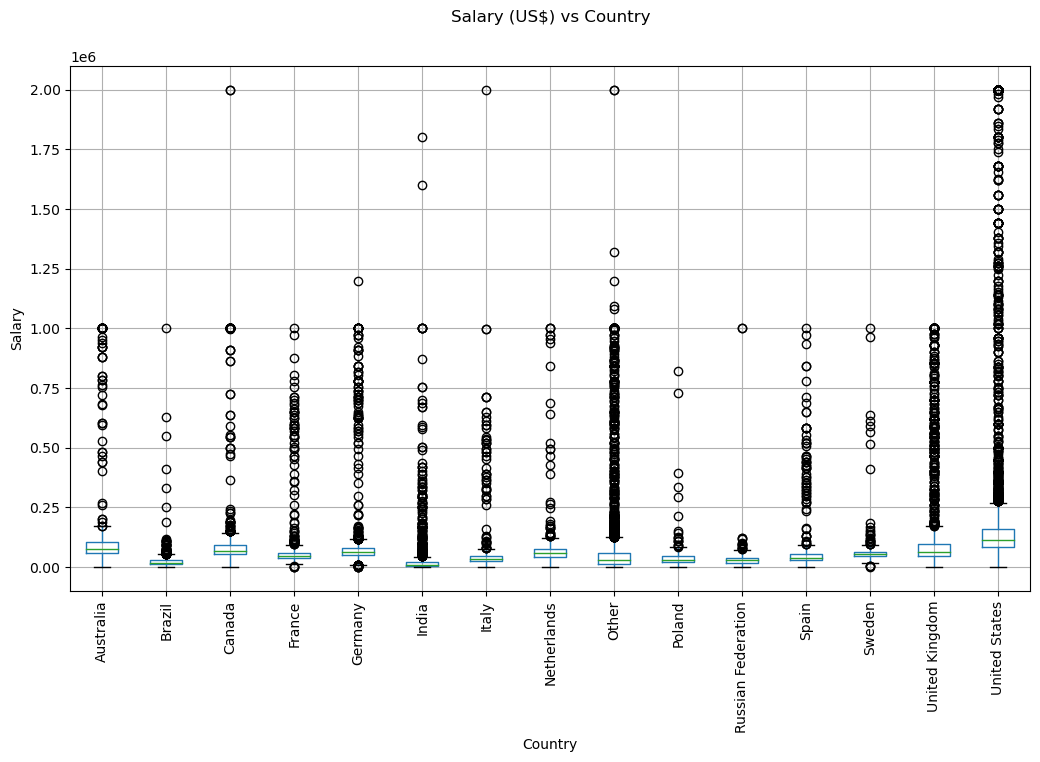

In [484]:
fig, ax = plt.subplots(1,1,figsize=(12,7))
df.boxplot("Salary","Country",ax=ax)
plt.suptitle("Salary (US$) vs Country")
plt.title("")
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()

In [485]:
#Choosing an upper limit of $250,000 and a lower limit of $10,000
df = df[df["Salary"] >= 10000]
df = df[df["Salary"] <= 250000]
df = df[df["Country"] != "Other"]

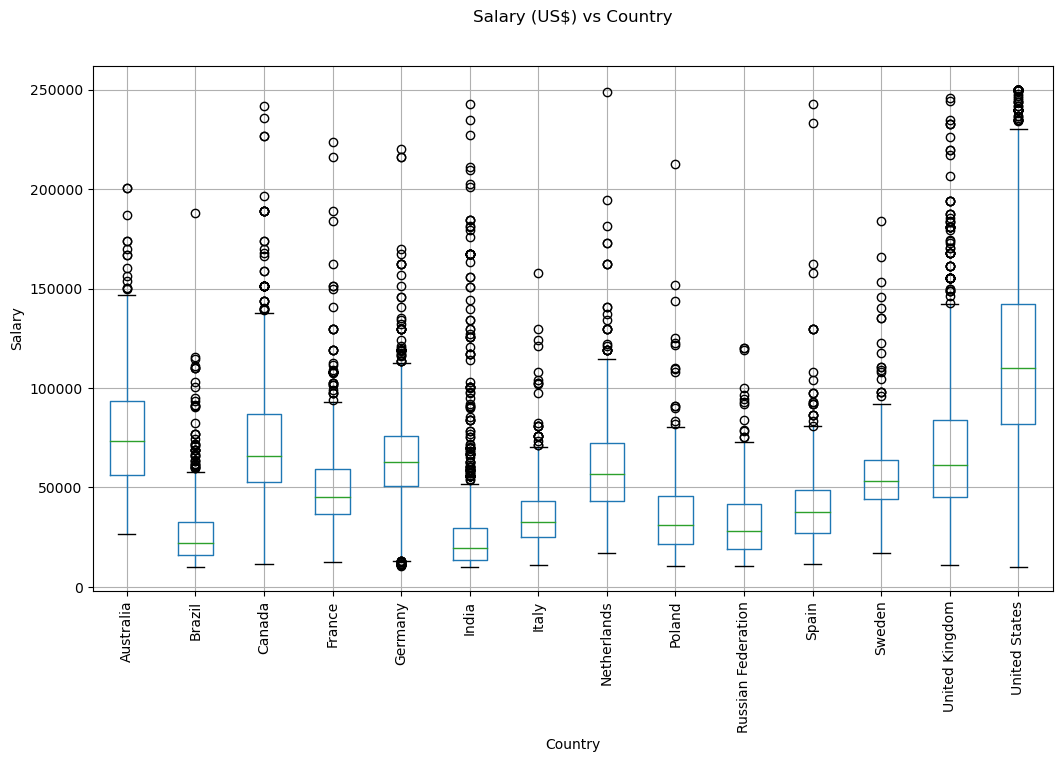

In [486]:
fig, ax = plt.subplots(1,1,figsize=(12,7))
df.boxplot("Salary","Country",ax=ax)
plt.suptitle("Salary (US$) vs Country")
plt.title("")
plt.ylabel("Salary")
plt.xticks(rotation=90)
plt.show()

In [487]:
df["YearsCodePro"].unique()

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [488]:
def clean_experience(x):
    if x == "Less than 1 year":
        return 0.5 
    if x == "More than 50 years":
        return 50
    return float(x)

df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)

In [489]:
df["YearsCodePro"].unique()

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 12. , 29. ,  6. ,
       28. ,  8. , 23. , 15. , 25. ,  9. , 11. ,  0.5,  5. , 21. , 16. ,
       18. , 14. , 32. , 19. , 22. , 38. , 30. , 26. , 27. , 17. , 24. ,
       34. , 35. , 33. , 36. , 40. , 39. , 50. , 31. , 37. , 41. , 45. ,
       42. , 44. , 43. , 49. ])

In [490]:
df["EdLevel"].unique()

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [491]:
# x = df["EdLevel"]
# y =df["EdLevel"].unique()
# print(len(x) == len(y))

In [492]:
def clean_edlevel(x):
    if "Bachelor’s degree" in x:
        return "Bachelors degree"
    if "Master’s degree" in x:
        return "Masters degree"
    if "Professional degree" in x or "Other doctoral" in x:
        return "Post grad"
    return "Less than a Bachelors"

In [493]:
df["EdLevel"] = df["EdLevel"].apply(clean_edlevel)

In [494]:
df["EdLevel"].unique()

array(['Bachelors degree', 'Masters degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

Label Encoding/ Preprocessing

In [495]:
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder()
df["EdLevel"] = le_education.fit_transform(df["EdLevel"])
df["EdLevel"].unique()

array([0, 2, 1, 3])

In [496]:
le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df["Country"])
df["Country"].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [497]:
X = df.drop("Salary",axis=1)
y = df["Salary"]

In [498]:
from sklearn.linear_model import LinearRegression 
linear_reg = LinearRegression()
linear_reg.fit(X,y.values)

LinearRegression()

In [499]:
y_pred1 = linear_reg.predict(X)

In [500]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
error = np.sqrt(mean_squared_error(y,y_pred1))

In [501]:
error

39274.75368318509

In [502]:
from sklearn.tree import DecisionTreeRegressor 
dec_tree_reg = DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X,y.values)

DecisionTreeRegressor(random_state=0)

In [503]:
y_pred2 = dec_tree_reg.predict(X)

In [504]:
error = np.sqrt(mean_squared_error(y,y_pred2))
error

29414.938206831015

In [505]:
from sklearn.ensemble import RandomForestRegressor
rand_forest_reg = RandomForestRegressor(random_state=0)
rand_forest_reg.fit(X,y.values)

RandomForestRegressor(random_state=0)

In [506]:
y_pred3 = rand_forest_reg.predict(X)

In [507]:
error = np.sqrt(mean_squared_error(y,y_pred3))
error

29487.30868635557

In [508]:
from sklearn.model_selection import GridSearchCV
max_depth = [None,2,4,6,8,10,12]
parameters = {"max_depth":max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X,y.values)


GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [509]:
regressor = gs.best_estimator_

regressor.fit(X,y.values)

DecisionTreeRegressor(max_depth=8, random_state=0)

In [510]:
y_pred4 = regressor.predict(X)
error = np.sqrt(mean_squared_error(y,y_pred4))
error

30428.508362980854

In [511]:
X

,Country,EdLevel,YearsCodePro
7,13,0,13.0
9,12,2,4.0
10,12,0,2.0
11,10,1,7.0
12,7,1,20.0
...,...,...,...
64113,13,1,15.0
64116,13,0,6.0
64122,13,1,4.0
64127,13,3,12.0


In [512]:
#Sample Input 
X = np.array([['United States', 'Masters degree', 15 ]])
X         

array([['United States', 'Masters degree', '15']], dtype='<U14')

In [513]:
X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X

array([[13.,  2., 15.]])

In [514]:
y_pred5 = regressor.predict(X)
y_pred5

C:\Users\lucky\anaconda3\envs\mlapp\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([139427.26315789])

In [515]:
import pickle

In [516]:
data = {"model":regressor,"le_country":le_country,"le_education":le_education}
with open('saved_steps.pkl','wb') as file:
    pickle.dump(data,file)

In [517]:
with open('saved_steps.pkl','rb') as file:
    data = pickle.load(file)
    
regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

In [518]:
y_pred = regressor_loaded.predict(X)
y_pred

C:\Users\lucky\anaconda3\envs\mlapp\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([139427.26315789])